# **<font color="blue">Прогнозирование оттока посетителей фитнес-центра</font>**

### Описание проекта

- Нужно спрогнозировать вероятность оттока для каждого клиента фитнес-центра
- Сформировать портрет клиента
- Разработать рекомендации по повышению качества работы с клиентами

### Описание данных

***Данные клиента за предыдущий до проверки факта оттока месяц:***

        - 'gender' — пол (1 - женский);
        - 'Near_Location' — проживание или работа в районе (1 - работа), где находится фитнес-центр;
        - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
        - Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
        - 'Phone' — наличие контактного телефона;
        - 'Age' — возраст;
        - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
        
        
***Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:***

        - 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
        - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
        - 'Group_visits' — факт посещения групповых занятий;
        - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
        - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
        - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
        - 'Churn' — факт оттока в текущем месяце.

### Задачи проекта

- **<font color="green">Шаг 1. Загрузка данных</font>**

**Задача**

- Импортируем библиотеки
- Загрузим данные


- **<font color="green">Шаг 2. Исследовательский анализ данных (EDA)</font>**

**Задача**

- Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения (пригодится метод describe());
- Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуемся методом groupby());
- Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Пострим матрицу корреляций и отобразим её.



- **<font color="green">Шаг 3. Построим модель прогнозирования оттока клиентов</font>**

**Задача**

*Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:*

    - Разбобьем данные на обучающую и валидационную выборку функцией train_test_split().
    - Обучим модель на train-выборке двумя способами:
    логистической регрессией,  случайным лесом.
    - Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели.Выберем лучшую модель по метрикам?

- **<font color="green">Шаг 4. Сделаем кластеризацию клиентов</font>**

**Задача**

- Стандартизируем данные.
- Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположим, какое количество кластеров можно выделить.
- Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. За число кластеров принять n=5. 
- Посмотрим на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
- Построим распределения признаков для кластеров. Можно ли что-то заметить по ним?
- Для каждого полученного кластера посчитаем долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

- **<font color="green">Шаг 5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами</font>**

**Задача**

- Сформулируем основные выводы и предложим рекомендации для стратегии взаимодействия с клиентами и их удержания.


## **<font color="green">Шаг 1. Изучение данных</font>**


- **<font color="brown">Импортируем библиотеки</font>**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from itertools import combinations
from sklearn.metrics import silhouette_score

- **<font color="brown">Загрузим данные</font>**

In [2]:
import os
if os.path.exists('gym_churn.csv'):
    df = pd.read_csv('gym_churn.csv') # локальный путь
else:
    df = pd.read_csv('/datasets/gym_churn.csv') # путь указанный в проекте

## **<font color="green">Шаг 2. Исследовательский анализ данных (EDA)</font>**


- **<font color="brown">Выведем основные показатели датафрема</font>**

In [3]:
def info_about_df(row):
    
    print(f'Количество строк - {row.shape[0]}')
    print(f'Количество столбцов - {row.shape[1]}')    
    print()
    print()
    
    print('\033[1m'+'Посмотрим на 5 первых строк датафрейма:'+'\033[0m')    
    display(row.head())
    print()
    print()

    print('\033[1m'+'Посмотрим на описание числовых данных:'+'\033[0m')     
    display(row.describe())
    print()
    print()
    
    print('\033[1m'+'Количество уникальных значений:'+'\033[0m')
    for i in row.columns:
        print('Колонка - ',i)
        print('    Уникальных значений - ',row[i].nunique())
        print()
    print()
        
    print('\033[1m'+'Посмотрим на типы данных:'+'\033[0m')  
    print(row.info())
    print()
    print()
        
    print('\033[1m'+'Количество пропусков в колонках:'+'\033[0m')
    print(row.isna().sum())
    print('\033[1m'+'Посмотрим на пропуски в процентах:'+'\033[0m')
    print(round((df.isna().mean()*100),2))
    print()
    print()

    print('\033[1m'+'Посмотрим на количество дубликатов по всем колонкам:'+'\033[0m')    
    print(row.duplicated().sum())      
    print(f'В процентах от количества всех строк - {round(df.duplicated().sum()/df.shape[0]*100,2)}%')

In [4]:
info_about_df(df)

Количество строк - 4000
Количество столбцов - 14


Посмотрим на 5 первых строк датафрейма:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0




Посмотрим на описание числовых данных:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000




Количество уникальных значений:
Колонка -  gender
    Уникальных значений -  2

Колонка -  Near_Location
    Уникальных значений -  2

Колонка -  Partner
    Уникальных значений -  2

Колонка -  Promo_friends
    Уникальных значений -  2

Колонка -  Phone
    Уникальных значений -  2

Колонка -  Contract_period
    Уникальных значений -  3

Колонка -  Group_visits
    Уникальных значений -  2

Колонка -  Age
    Уникальных значений -  23

Колонка -  Avg_additional_charges_total
    Уникальных значений -  4000

Колонка -  Month_to_end_contract
    Уникальных значений -  12

Колонка -  Lifetime
    Уникальных значений -  29

Колонка -  Avg_class_frequency_total
    Уникальных значений -  3913

Колонка -  Avg_class_frequency_current_month
    Уникальных значений -  3820

Колонка -  Churn
    Уникальных значений -  2


Посмотрим на типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                           

- **<font color="brown">Приведем названия колонок к нижнему регистру</font>**

In [5]:
df.columns = [x.lower() for x in df.columns]

- **<font color="brown">Взглянем на распределение целочисленных полей в колонках</font>**

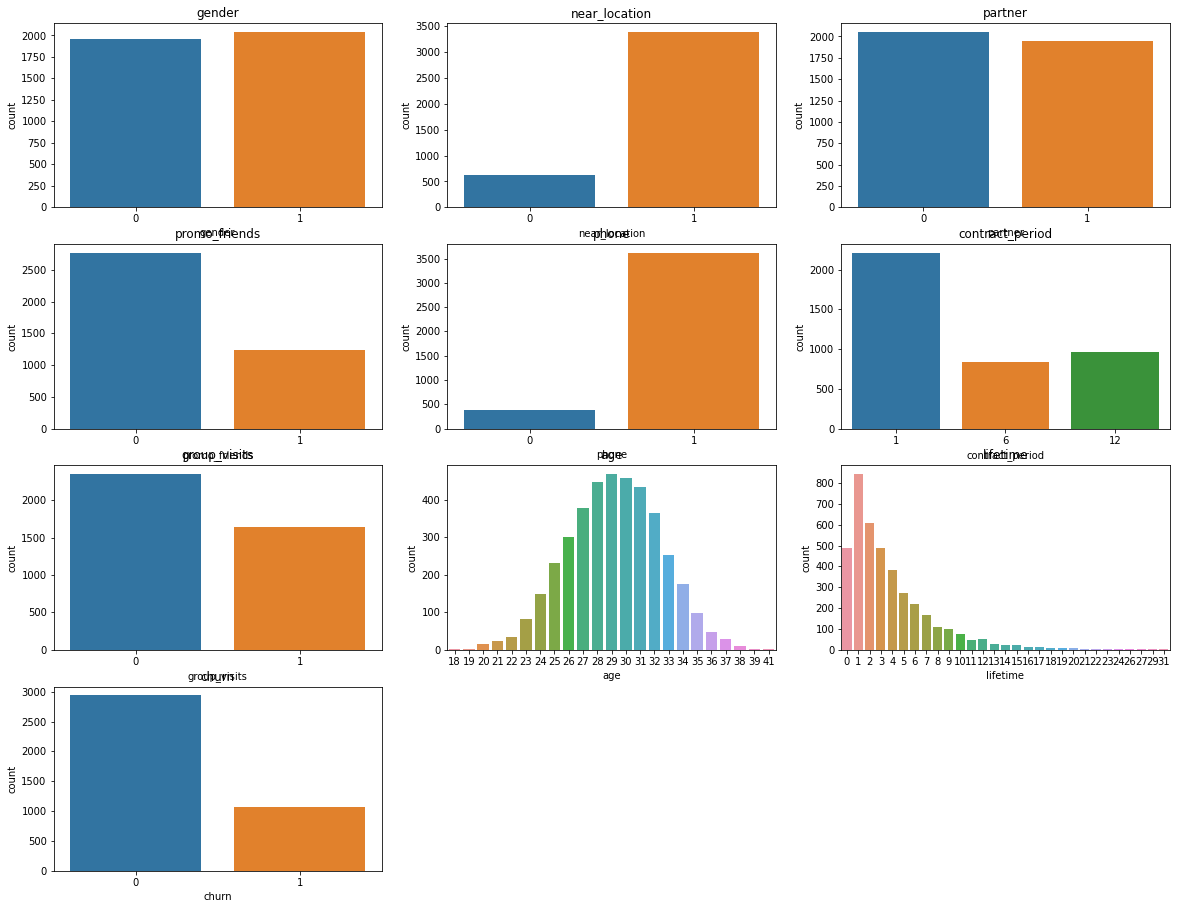

In [6]:
plt.figure(figsize=(20, 40))
numeric_columns = df.select_dtypes(include=["int"]).columns

for i, column in enumerate(numeric_columns):

    plt.subplot(len(numeric_columns),3, i+1)  

    sns.countplot(x=column, data=df)
    
    plt.title(column)
    #plt.show()
    #print(df[column].sum() / df[column].count())


**Средние значения / стандартное отклонение данных**
- с небольшим перевесом преобладает женский пол в фитнес-центре / std почти совпало со средним, хорошо
- большинство клиентов ходит в спорт зал с работы / std в норме
- больше обычных клиентов, не сотрудников партнеров / std почти совпало со средним, хорошо
- большинство не участвовало в акции 'приведи друга' / std в норме
- почти все клиенты имеют контактные телефоны / std очень низкое
- длительность абонемента 4,7 месяца / std почти совпало со средним, хорошо
- большинство не посещает групповые занятия / std почти совпало со средним, хорошо
- клиенты имеют возраст 29 лет, медианный возраст также 29
- дополнительные затраты - 146 / std 96, высокова то, есть выбросы
- в остальных столбцах std почти совпадает со средним, что говорит об отсутствии явных выбросов

- **<font color="brown">Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался</font>**

In [7]:
df_mean = df.groupby('churn').agg({'mean'})

#Уберем нижний уровень названий 'mean'
df_mean.columns = [tup[0] if tup[0] else tup[1] for tup in df_mean.columns]

df_mean

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


- **Визуализируем данные**

/tmp/ipykernel_84/1475091087.py:7: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(x=column, data=df_mean, autopct = '%0.0f%%',labels=labels)


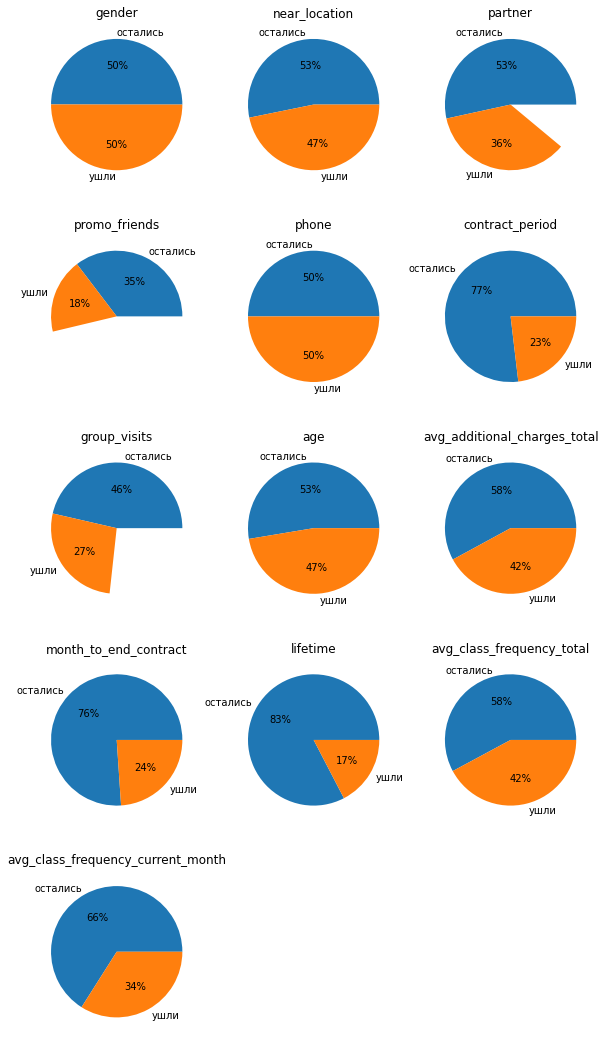

In [8]:
plt.figure(figsize=(10, 50))

for i, column in enumerate(df_mean.columns):

    plt.subplot(len(df_mean.columns),3, i+1)  
    labels = ['остались','ушли']
    plt.pie(x=column, data=df_mean, autopct = '%0.0f%%',labels=labels)
    plt.title(column)

**Средние признаков тех, кто ушел и кто остался**

- М или Ж не важно, уходят одинаковое количество
- Если фитнес рядом с домом - остаются охотнее
- Сотрудники компаний-партнеров уходят реже
- По акции 'приведи друга' уходят реже
- Наличие контактного телефона не влияет на уход
- Чем длительнее абонемент, тем реже уходит клиент
- Клиент, посещающий групповые занятия, уходит реже
- Возраст не влияет на уход
- Чаще уходят те, кто меньше тратит на дополнительные услуги фитнеса
- Чем больше времени до конца контракта, тем реже человек уходит
- Чем Выше Лайфтайм, тем клиент уходит реже
- Кто чаще ходит в неделю, тот чаще остается в зале
- Кто чаще ходит в месяц, тот чаще остается в зале

- **<font color="brown">Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)</font>**

                            ОСТАЛИСЬ                                                            УШЛИ


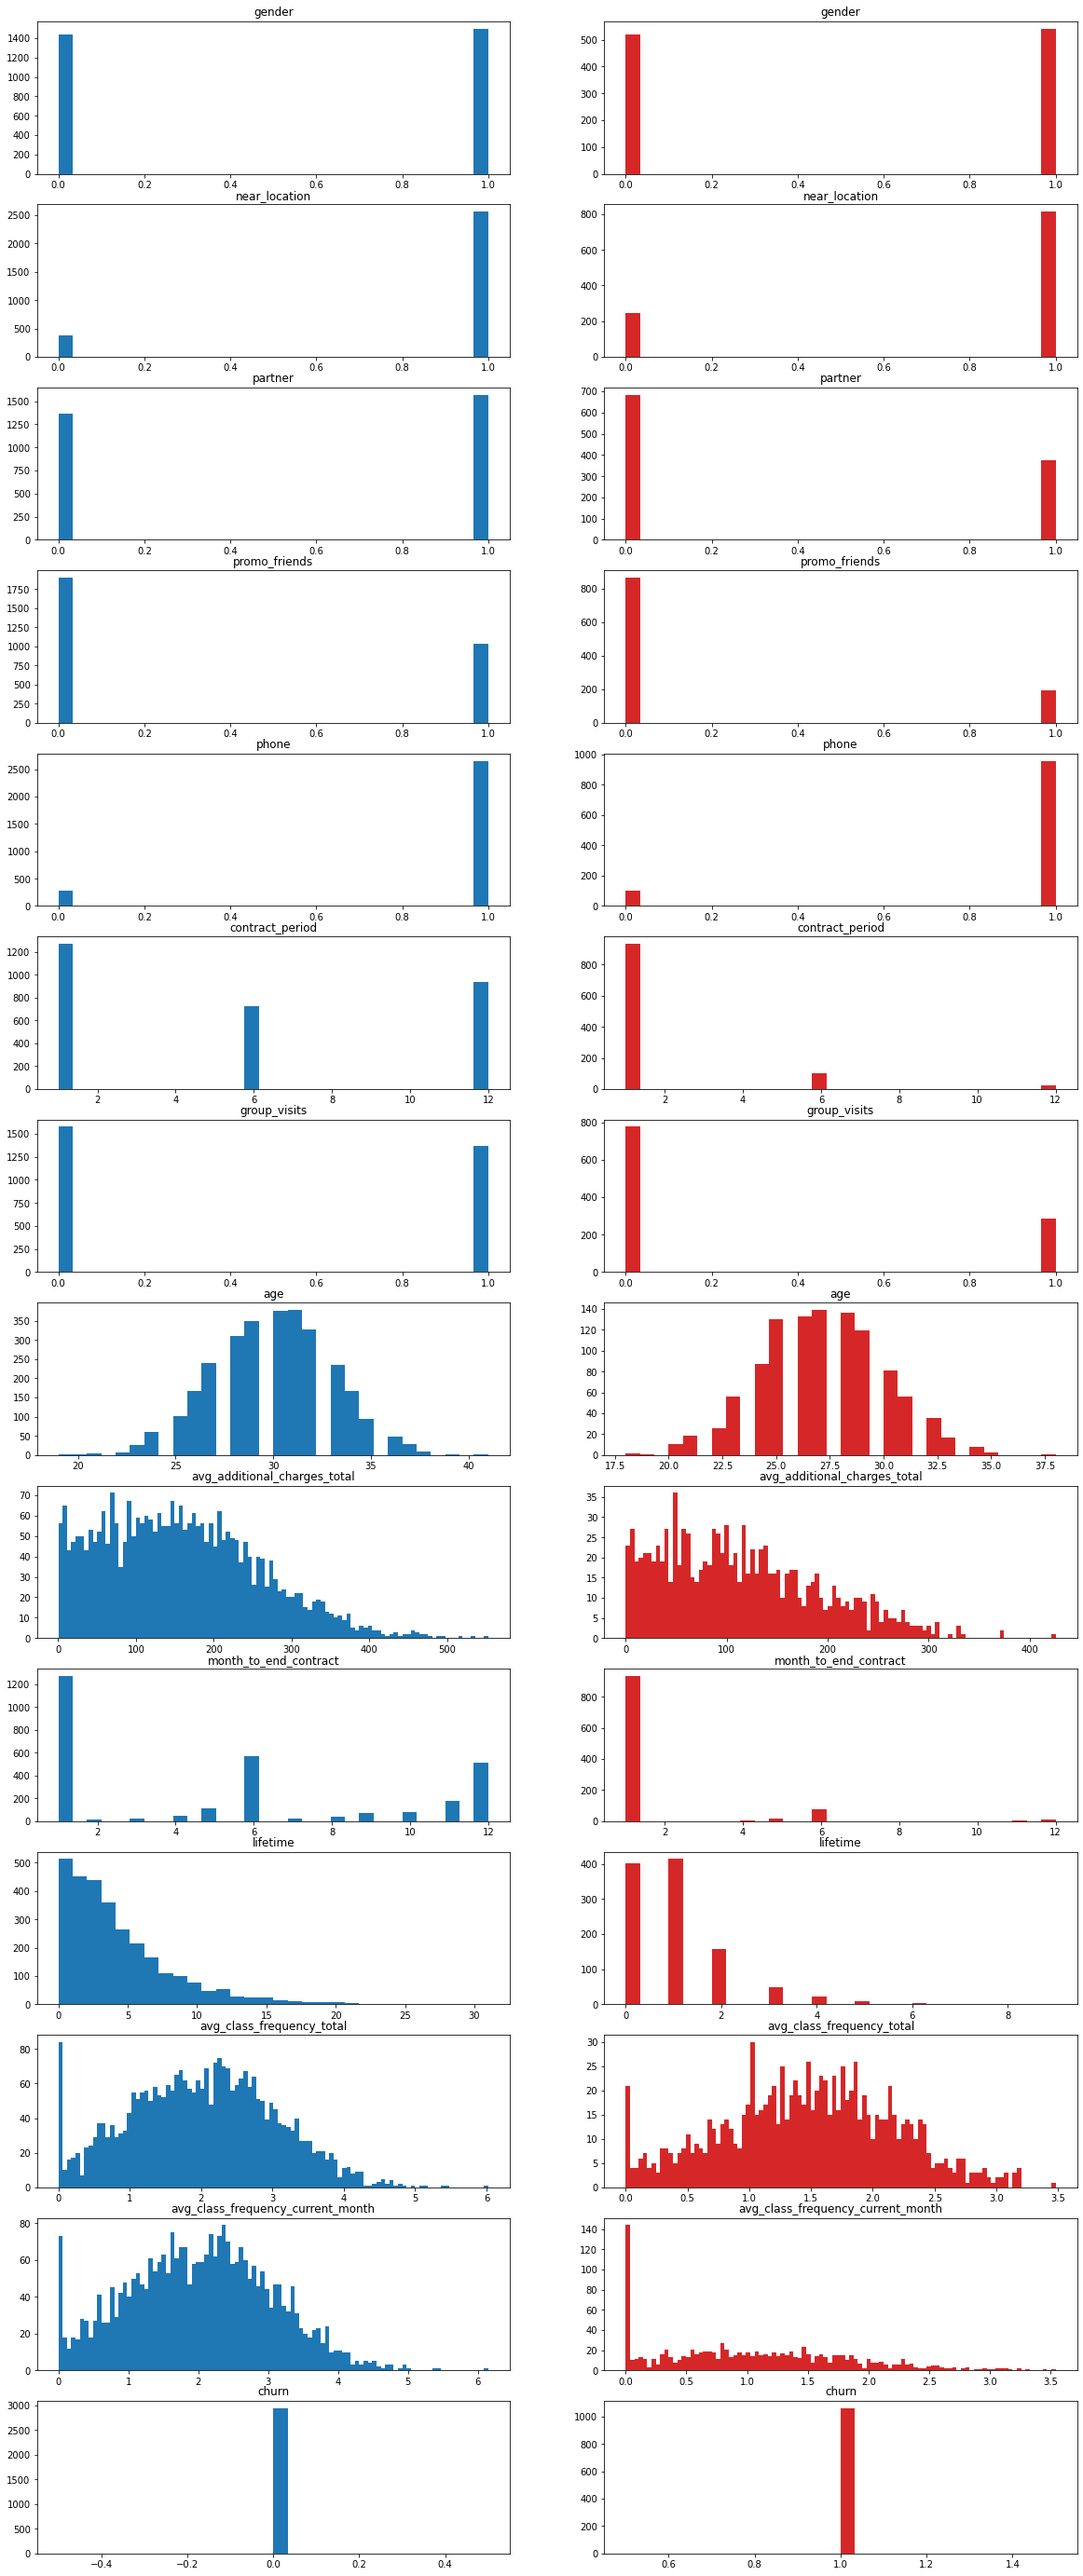

In [9]:
plt.figure(figsize=(20, 50))

#target_columns = ["product_price", "delivery_price", "product_discount", 
#                   "delivery_discount", "n_items", "n_samples", "use_pomocode"]

k = 1
for colname in df.columns:
    if colname in ['avg_additional_charges_total','avg_class_frequency_total', 'avg_class_frequency_current_month']:
        bins = 100
    else:
        bins = 30
     
    plt.subplot(len(df.columns), 2, k)
    plt.hist(df[df["churn"] == 0][colname], bins=bins)
    plt.title(colname)
    
    plt.subplot(len(df.columns), 2, k+1)
    plt.hist(df[df["churn"] == 1][colname], color="tab:red", bins=bins)
    plt.title(colname)
    
    k+=2
print('\033[1m'+'                            ОСТАЛИСЬ                                                            УШЛИ'+'\033[0m')


**Наложим графики друг на друга**

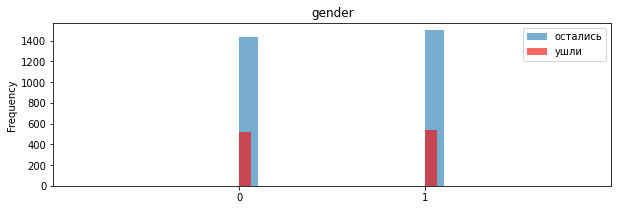

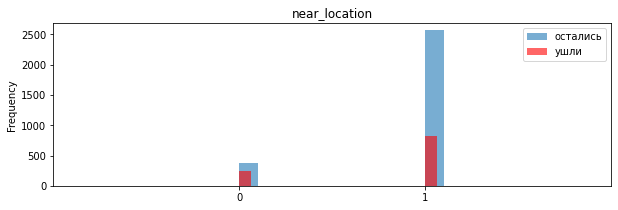

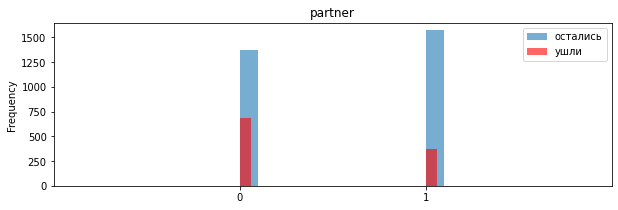

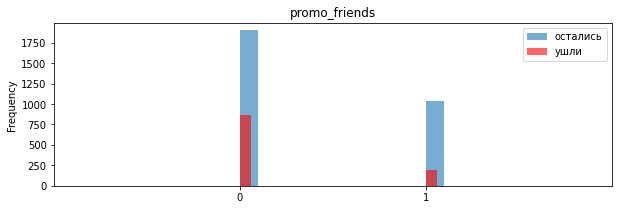

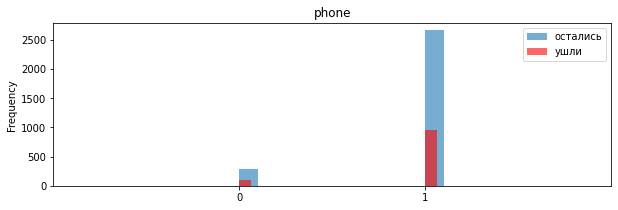

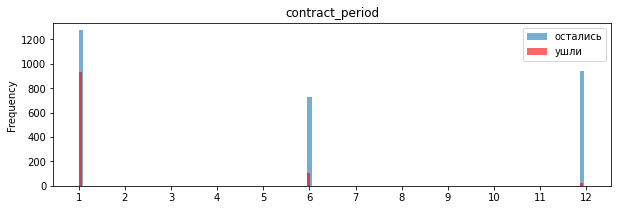

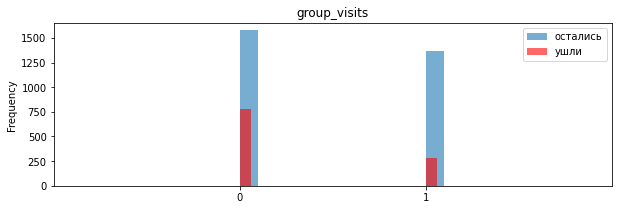

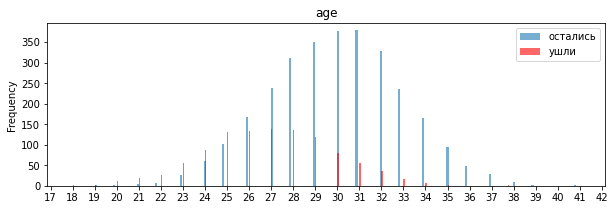

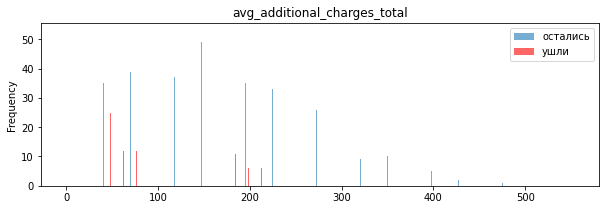

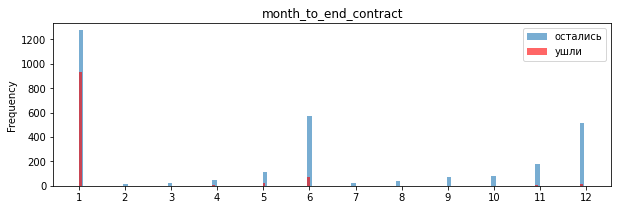

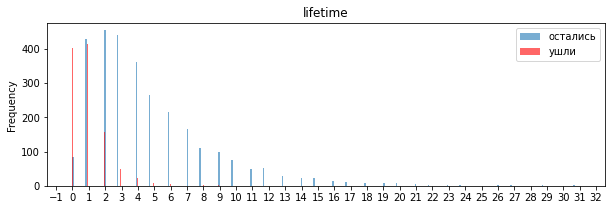

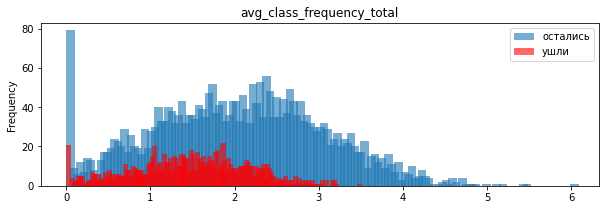

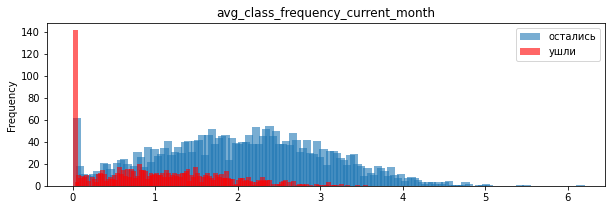

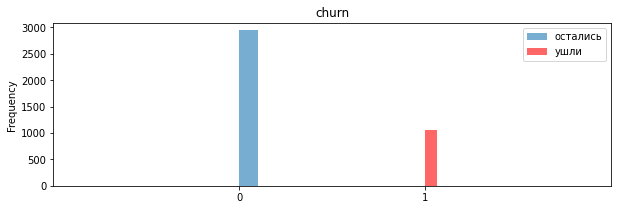

In [10]:
for i, colname in enumerate(df.columns):
    # Изменим корзины для некоторых полей
    if colname in ['avg_additional_charges_total','avg_class_frequency_total', 'avg_class_frequency_current_month']:
        bins = 150
    else:
        bins = 80

    # Изменим названия осей для булевых полей
    if colname in ['gender', 'near_location', 'partner', 'promo_friends', 'phone','group_visits','churn']:
        plt.xlim(-1, 2)
        plt.xticks([0, 1])
        range=(0,5)
    else:    
        range=None

        #строим графики
    ax = df[df["churn"] == 0][colname].plot(kind='hist',
                                            bins=bins,
                                            alpha=0.6,
                                            label='остались',
                                            range=range,
                                            figsize=(10,3), width=0.1)
    df[df["churn"] == 1][colname].plot(kind='hist',
                                       bins=bins,
                                       alpha=0.6,
                                       ax=ax,  # это важно для 2х графиков, оси равные
                                       label='ушли',
                                       color='red',
                                       range=range,
                                       legend=True,
                                       figsize=(10,3),
                                       width=0.06,
                                       title=colname)
    if colname not in ['gender', 'near_location', 'partner',
                       'promo_friends', 'phone','group_visits',
                       'churn','avg_additional_charges_total']:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
    plt.legend(loc='upper right') # чтобы в легенде было два поля
    plt.show()

**Распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**
- Распределения по возрасту - нормальные, остаются в основном 28-31летние, уходят 2-28летние
- По дополнительным платам - есть часто использующие в районе 150, а также редко, но значительные суммы
- Месяцев до конца абонемента - уходят в основном те, кому остался 1 месяц
- Лайфтайм - уходят в основном те, кто ходит до 2х месяцев. Основной лайфтайм - 1 год, но есть и долгожителя клуба
- Общая средняя частота посещений и частота посещений в месяц имеют схожие распределения с пиками в 0. Кто то записался в клуб, н они разу не ходил. А может и просто не был отмечен

- **<font color="brown">Уберем выбросы в небулевых колонках</font>**

**Посмотрим на выбросы**

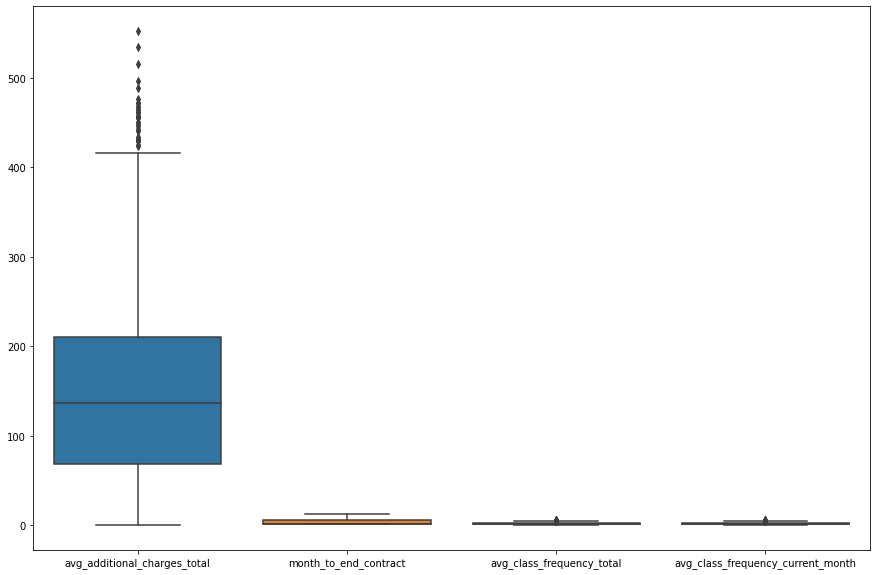

In [11]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['avg_additional_charges_total',
                     'month_to_end_contract',
                     'avg_class_frequency_total',
                     'avg_class_frequency_current_month']]);

**Напишем функцию расчета quantile**

In [12]:
def q(colum):
    q3 = df[colum].quantile(0.75)
    q1 = df[colum].quantile(0.25)
    iqr = q3 - q1
    threshold_top = q3 + 1.5 * iqr
    return threshold_top

**Создадим новый датафрейм без выбросов**

In [13]:
df2 = df.query('0 < avg_additional_charges_total < @q("avg_additional_charges_total") and\
                0 < month_to_end_contract < @q("month_to_end_contract") and\
                0 < avg_class_frequency_total < @q("avg_class_frequency_total") and\
                0 < avg_class_frequency_current_month< @q("avg_class_frequency_current_month")')    

**Проверим сколько данных убрали**

In [14]:
df.shape

(4000, 14)

In [15]:
df2.shape

(3746, 14)

- Потеряли всего 254 строки, 6%, ничего страшного. Зато теперь чище даннные

- **<font color="brown">Построим матрицу корреляций и отобразим её.</font>**

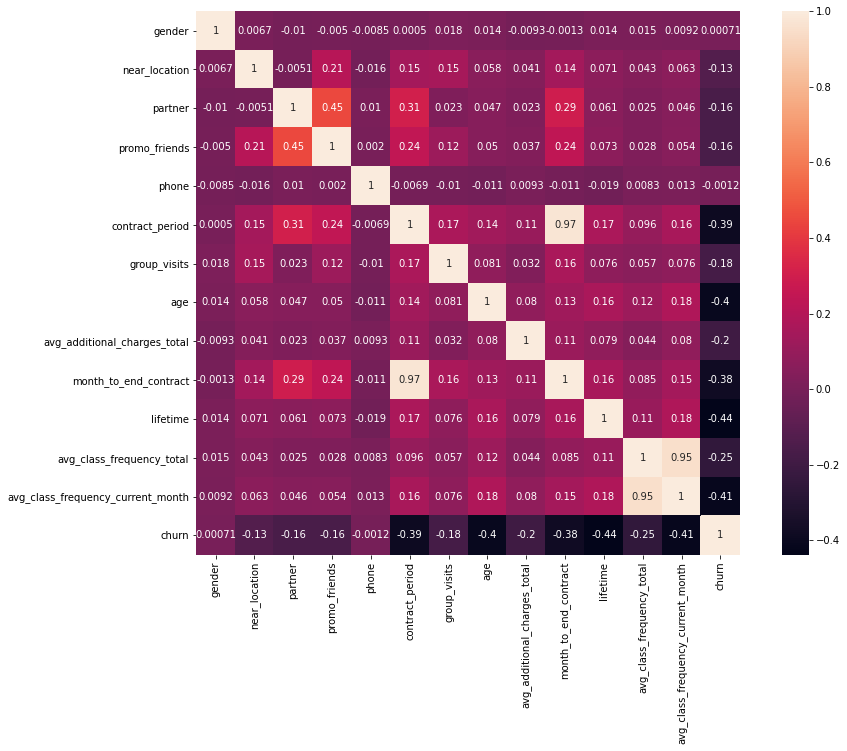

In [16]:
corrMatrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corrMatrix, annot=True, square=True);

**Корреляция**
- Высокая корреляция у срока абонемента и количество месяцев до конца абонемента.
- Высокая корреляция у средней частоты посещения в месяц и общим средним посещением фитнес центра
- Касаемо целевой переменной (отток): 
        - отрицательная корреляция с временем с момента первого обращения в фитнес-центр. Чем больше lifetime, тем чаще клиент остается 
        - отрицательная корреляция с частотой посещений в месяц. Чем чаще ходит в месяц, тем реже уходит клиент
        - отрицательная корреляция со сроком абонемента. Чем дольше абонемент, тем реже уходит клиент
        - отрицательная корреляция с количество месяцев до конца абонемента. Чем больше месяцев осталось, тем реже уходит клиент

### Вывод

<div style="border:solid indigo 1px; padding: 20px">    

- *Имеем 14 колонок и 4000 строк*
- *Названия полей для удобства необходимо привести к нижнему регистру*
- *Цифры с плавающей запятой имеют по 6 знаков, это не критично, суммы легко читаются*
- *Пропусков НЕТ*
- *Дубликатов НЕТ*
    
**Средние значения / стандартное отклонение данных**
    
    - с небольшим перевесом преобладает женский пол в фитнес-центре / std почти совпало со средним, хорошо
    - большинство клиентов ходит в спорт зал с работы / std в норме
    - больше обычных клиентов, не сотрудников партнеров / std почти совпало со средним, хорошо
    - большинство не участвовало в акции 'приведи друга' / std в норме
    - почти все клиенты имеют контактные телефоны / std очень низкое
    - длительность абонемента 4,7 месяца / std почти совпало со средним, хорошо
    - большинство не посещает групповые занятия / std почти совпало со средним, хорошо
    - клиенты имеют возраст 29 лет, медианный возраст также 29
    - дополнительные затраты - 146 / std 96, высокова то, есть выбросы
    - в остальных столбцах std почти совпадает со средним, что говорит об отсутствии явных выбросов
    
**Средние признаков тех, кто ушел и кто остался**

    - М или Ж не важно, уходят одинаковое количество
    - Если фитнес рядом с домом - остаются охотнее
    - Сотрудники компаний-партнеров уходят реже
    - По акции 'приведи друга' уходят реже
    - Наличие контактного телефона не влияет на уход
    - Чем длительнее абонемент, тем реже уходит клиент
    - Клиент, посещающий групповые занятия, уходит реже
    - Возраст не влияет на уход
    - Чаще уходят те, кто меньше тратит на дополнительные услуги фитнеса
    - Чем больше времени до конца контракта, тем реже человек уходит
    - Чем Выше Лайфтайм, тем клиент уходит реже
    - Кто чаще ходит в неделю, тот чаще остается в зале
    - Кто чаще ходит в месяц, тот чаще остается в зале
    
**Распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**
    
    - Распределения по возрасту - нормальные, остаются в основном 28-31летние, уходят 25-28летние
    - По дополнительным платам - есть часто использующие в районе 150, а также редко, но значительные суммы
    - Месяцев до конца абонемента - уходят в основном те, кому остался 1 месяц
    - Лайфтайм - уходят в основном те, кто ходит до 2х месяцев. Основной лайфтайм - 1 год, но есть и долгожителя клуба
    - Общая средняя частота посещений и частота посещений в месяц имеют схожие распределения с пиками в 0. Кто то записался в клуб, но ни разу не ходил в фитнес. Пользовались иными плюшками
    
**Корреляция**
    
    - Высокая корреляция у срока абонемента и количество месяцев до конца абонемента.
    - Высокая корреляция у средней частоты посещения в месяц и общим средним посещением фитнес центра
*Касаемо целевой переменной (отток):* 
    
            * отрицательная корреляция с временем с момента первого обращения в фитнес-центр. Чем больше lifetime, тем чаще клиент остается 
            * отрицательная корреляция с частотой посещений в месяц. Чем чаще ходит в месяц, тем реже уходит клиент
            * отрицательная корреляция со сроком абонемента. Чем дольше абонемент, тем реже уходит клиент
            * отрицательная корреляция с количество месяцев до конца абонемента. Чем больше месяцев осталось, тем реже уходит клиент


## **<font color="green">Шаг 3. Построим модель прогнозирования оттока клиентов</font>**


**Посмотрим на доли целевой переменной**

In [17]:
df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

- **<font color="red">Метрики для сравнения алгоритмов</font>**

- **Долю правильных ответов** вычисляют так:

# $Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

- **Точность (precision)**. Показывает, какая доля прогнозов относительно "1" класса верна. 

# $Precision = \frac{TP}{TP+FP}$

- **Полнота (recall)**. Показывает, сколько реальных объектов "1" класса вы смогли обнаружить с помощью модели

# $Recall = \frac{TP}{TP+FN}$

где 

 •Прогноз модели = 1, реальное значение = 1.
True Positive («истинно положительные») — сокращённо TP.

 •Прогноз модели = 1, реальное значение = 0.
False Positive («ложно положительные») — сокращённо FP.

 •Прогноз модели = 0, реальное значение = 1.
False Negative («ложно отрицательные») — сокращённо FN.

 •Прогноз модели = 0, реальное значение = 0.
True Negative («истинно отрицательные») — сокращённо TN.


- **<font color="brown">Разделим наши данные на признаки (матрица X) и целевую переменную (y)</font>**

In [18]:
X = df2.drop('churn', axis = 1)
y = df2['churn']

In [19]:
df2.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

- **<font color="brown">Разделим модель на обучающую и валидационную выборку в соотношении 80 на 20</font>**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

- **<font color="brown">Обучим модель на train-выборке двумя способами:</font>**
    1. *Логистической регрессией*
    2. *Случайным лесом*


- **<font color="blue">1. Задаем алгоритм -  логистическая регрессия</font>**

*Обучим StandartScaler на обучающей выборке*

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

*Преобразуем обучающий и валидационные наборы данных*

In [22]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

*Зададим алгоритм для модели*

In [23]:
model1 = LogisticRegression(solver='liblinear')

*обучаем модель*

In [24]:
model1.fit(X_train_st,y_train)

LogisticRegression(solver='liblinear')

*воспользуемся уже обученной моделью, чтобы сделать прогнозы*

In [25]:
predictions = model1.predict(X_test_st)

- **<font color="brown">Выведим метрики для полученного прогноза</font>**

In [26]:
print('Accuracy (Доля правильных ответов): {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision (Точность): {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall (Полнота): {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy (Доля правильных ответов): 0.93
Precision (Точность): 0.87
Recall (Полнота): 0.87


**Логистическая регрессия**
- Доля правильных ответов - 93%. Отличный результат
- Точность 87%

- **<font color="blue">2. Задаем алгоритм -  случайный лес</font>**

*Обучим StandartScaler на обучающей выборке*

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

*Преобразуем обучающий и валидационные наборы данных*

In [28]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

*Зададим алгоритм для модели*

In [29]:
model2 = DecisionTreeClassifier(random_state=0)

*обучаем модель*

In [30]:
model2.fit(X_train_st,y_train)

DecisionTreeClassifier(random_state=0)

*воспользуемся уже обученной моделью, чтобы сделать прогнозы*

In [31]:
predictions = model2.predict(X_test_st)

*Выведим метрики для полученного прогноза*

In [32]:
print('Accuracy (Доля правильных ответов): {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision (Точность): {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall (Полнота): {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy (Доля правильных ответов): 0.89
Precision (Точность): 0.75
Recall (Полнота): 0.81


**Случайный лес**
- Доля правильных ответов - 89%. Отличный результат
- Точность 75%

### Вывод

<div style="border:solid indigo 2px; padding: 20px">

- Алгоритм **логистической регрессии** показал:
        - Accuracy (Доля правильных ответов): 0.93
        - Precision (Точность): 0.87
        - Recall (Полнота): 0.87
    
- Алгоритм **случайный лес** показал:
        - Accuracy (Доля правильных ответов): 0.89
        - Precision (Точность): 0.75
        - Recall (Полнота): 0.81
    
- По всем показателям алгоритм **Логистическая регрессия** показал себя лучше **Случайного леса**

## **<font color="green">Шаг 4. Сделаем кластеризацию клиентов</font>**


**Отложим столбец с оттоком**

In [33]:
df_clust = df2.drop('churn', axis=1)

- **<font color="brown">Стандартизируем данные</font>**

In [34]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(df_clust)

- **<font color="brown">Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму</font>**

In [35]:
linked = linkage(X_sc, method = 'ward') 

**В переменной linked сохранена таблица «связок» между объектами. Её будем визуализировать как дендрограмму:**

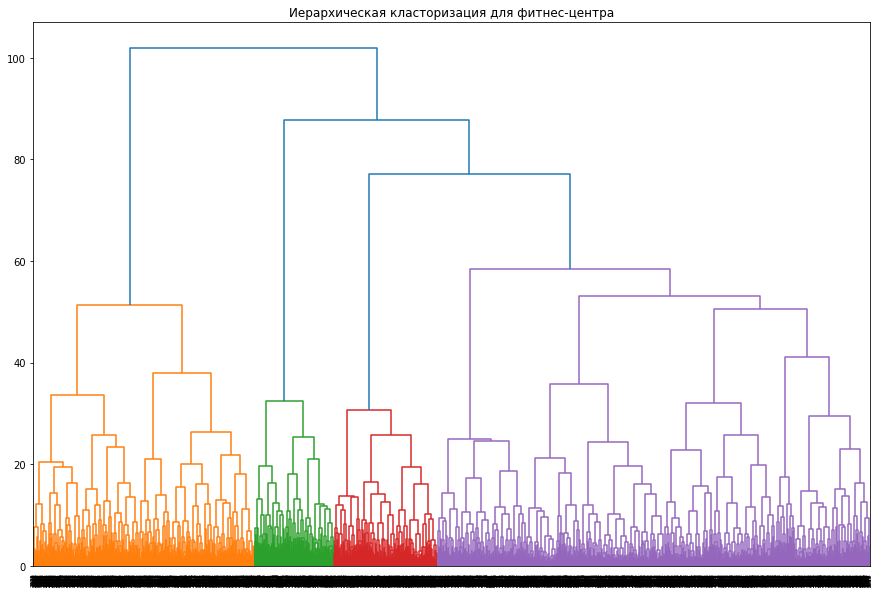

In [36]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая класторизация для фитнес-центра')
plt.show() 

- График выделил 4 класса.
- 4й класс имеет 2 крупные ветки, которые можно поделить
- Итого - **можно выделить 5 классов**

- **<font color="brown">Обучим модель кластеризации на основании алгоритма K-Means и спрогнозирем кластеры клиентов.</font>**

In [37]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(X_sc)

*Cохраняем метки кластера в поле датасета df2*

In [38]:
df2['cluster'] = labels

/tmp/ipykernel_84/1064113798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster'] = labels


*Выводим статистику по средним значениям наших признаков по кластеру*

In [39]:
df2.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.498786,0.939320,0.740291,0.486650,1.0,11.883495,0.543689,29.941748,160.722544,10.825243,4.678398,2.051350,2.044198,0.019417
1,0.493151,0.948630,0.825342,1.000000,1.0,3.119863,0.448630,29.208904,142.814055,2.902397,3.832192,1.820162,1.727883,0.226027
2,0.567296,0.838994,0.275472,0.065409,1.0,2.680503,0.445283,29.982390,154.171489,2.477987,4.850314,2.819455,2.815755,0.081761
3,0.546218,0.865546,0.473389,0.310924,0.0,4.907563,0.434174,29.333333,142.184415,4.588235,3.988796,1.953742,1.834527,0.249300
4,0.481450,0.732715,0.299325,0.017707,1.0,1.962901,0.281619,28.289207,131.227702,1.864250,2.375211,1.363572,1.129785,0.524452


- Средние показатели признаков по кластерам отличаются

*Отрисуем графики для попарных сочетаний признаков с разметкой по кластерам*

In [40]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


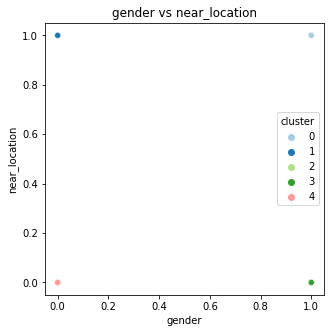

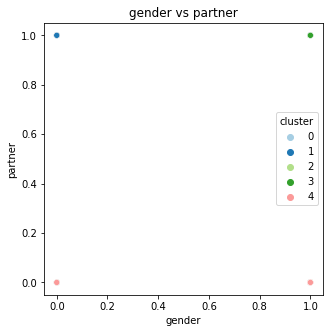

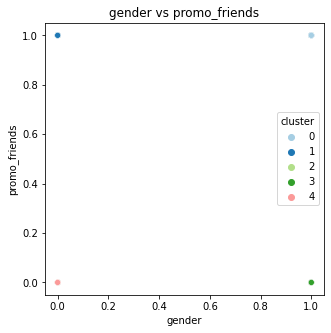

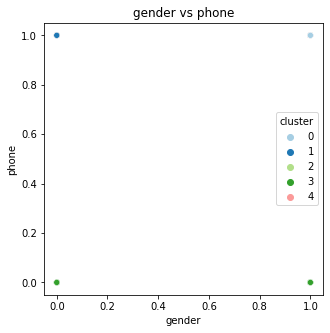

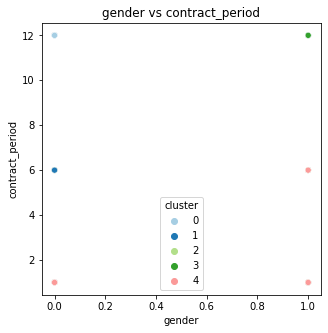

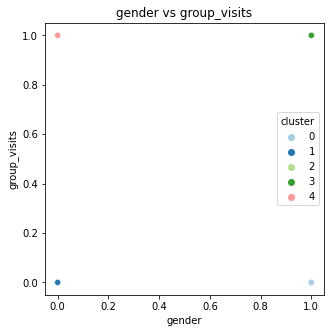

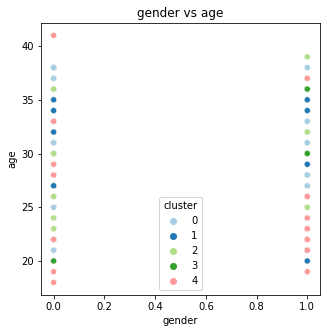

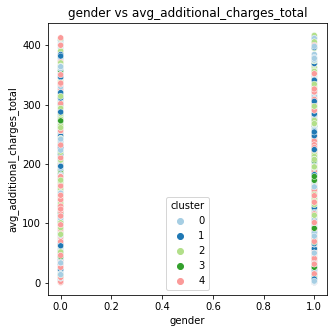

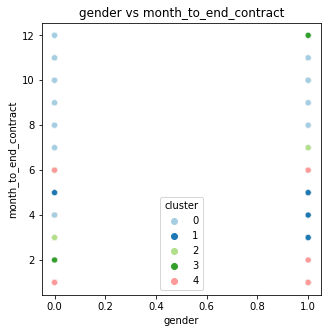

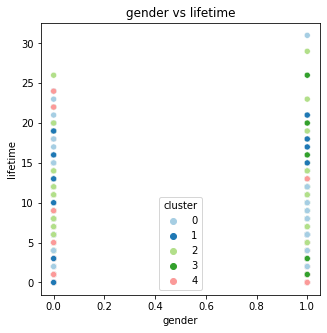

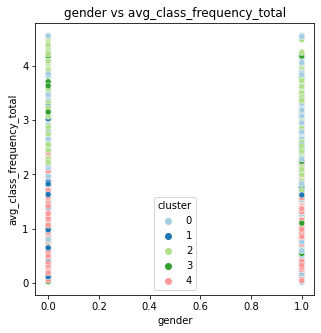

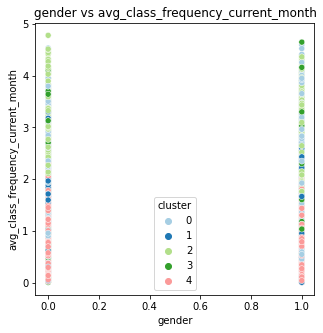

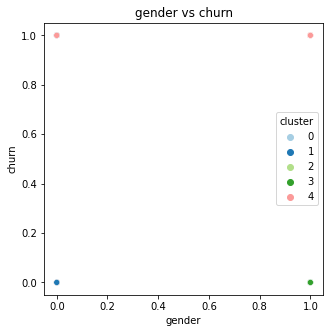

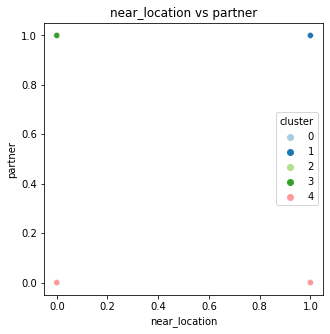

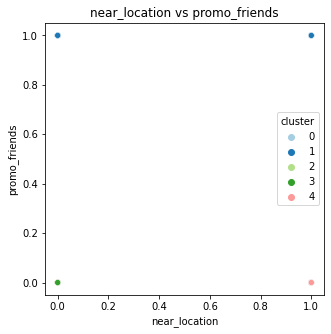

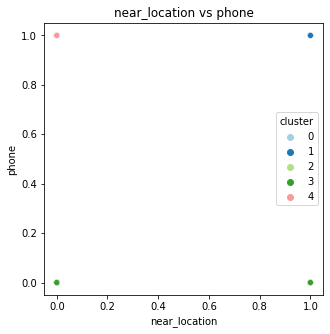

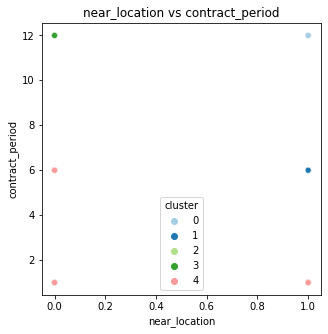

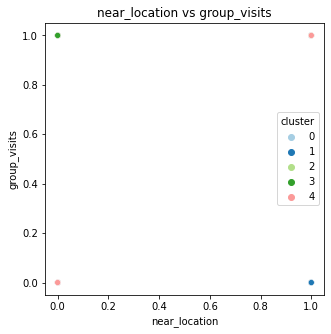

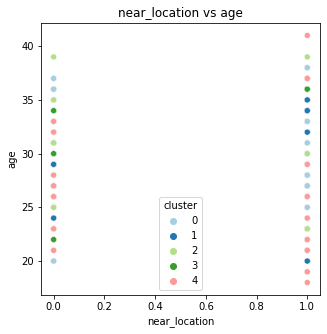

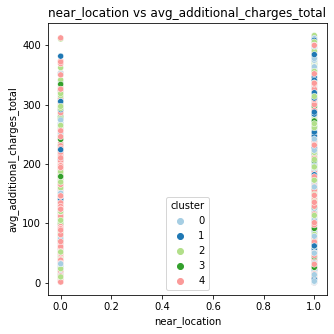

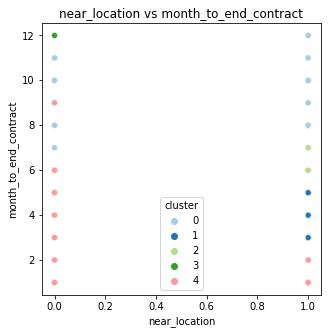

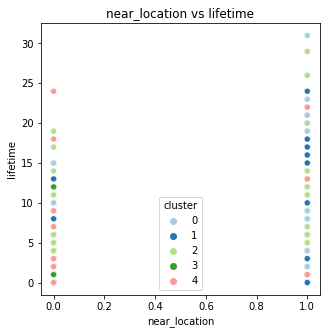

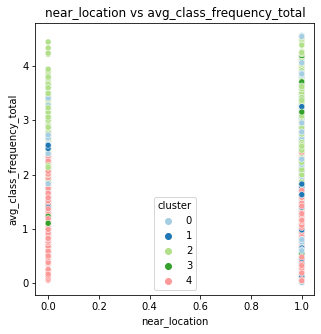

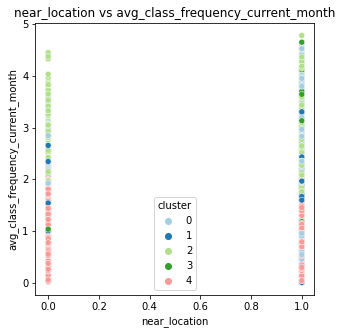

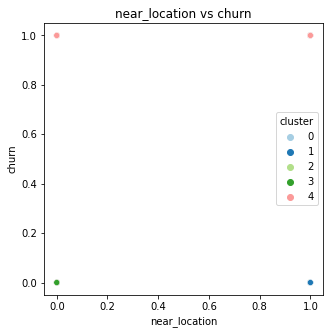

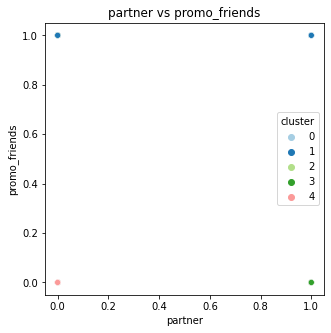

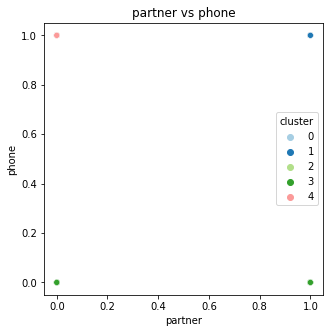

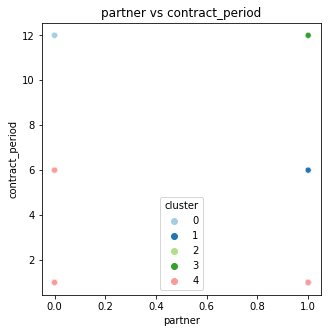

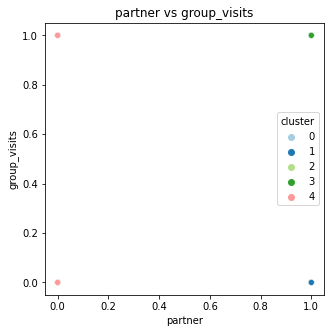

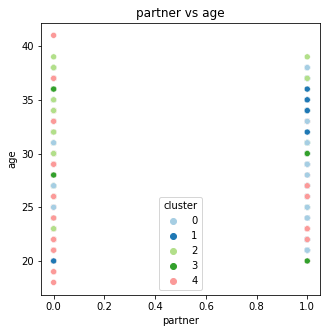

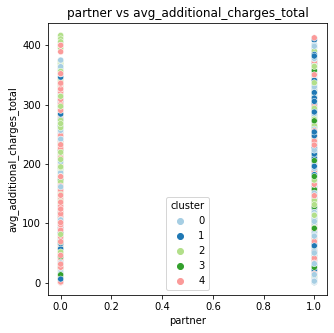

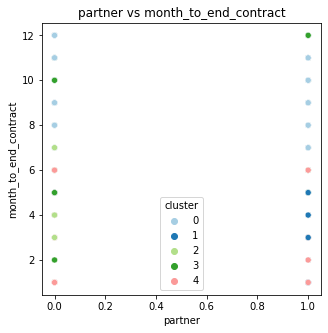

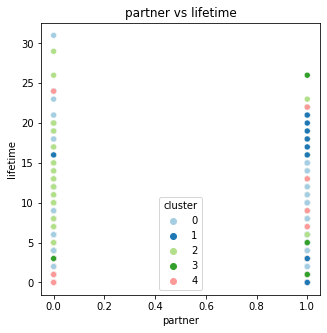

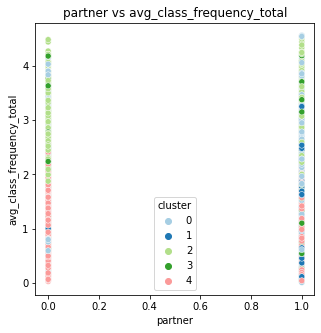

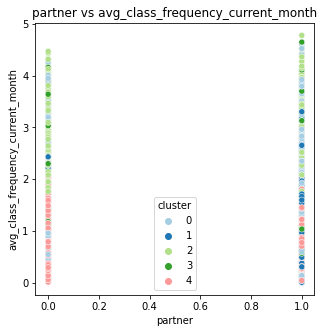

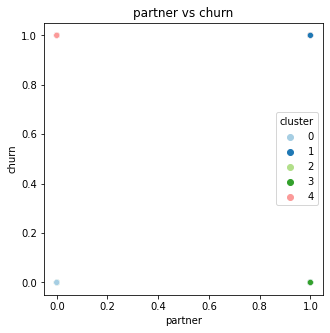

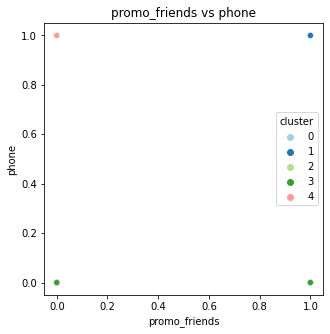

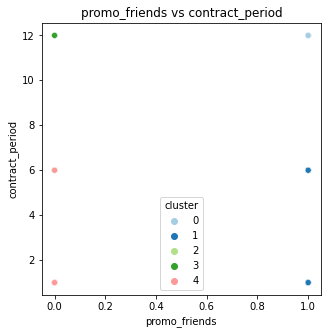

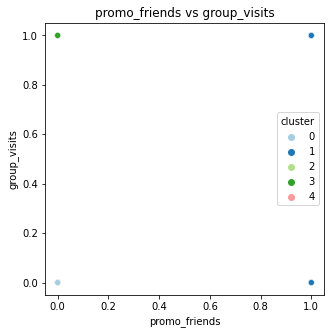

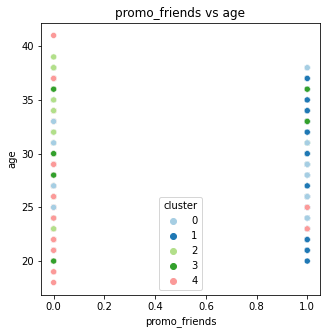

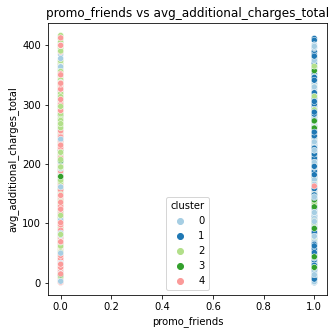

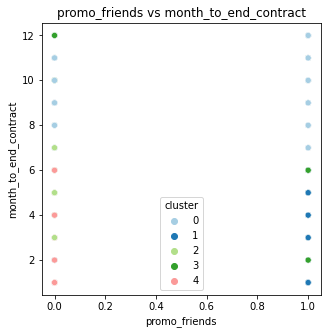

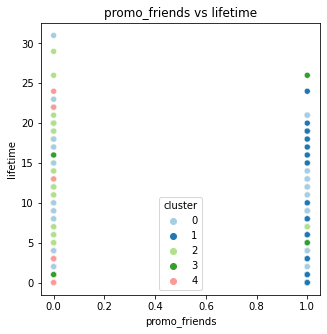

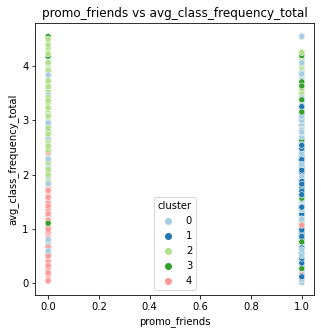

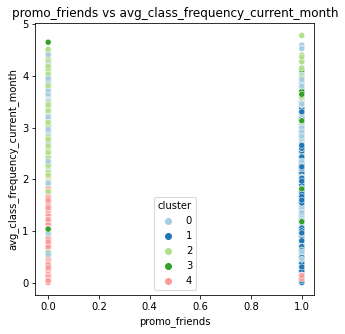

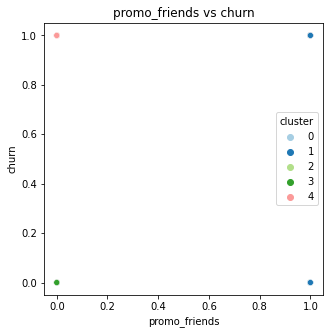

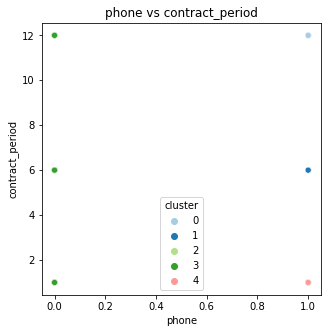

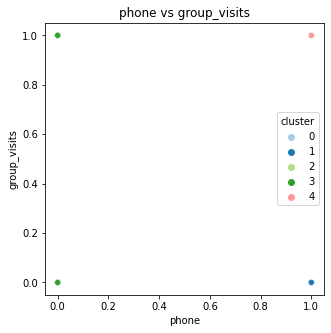

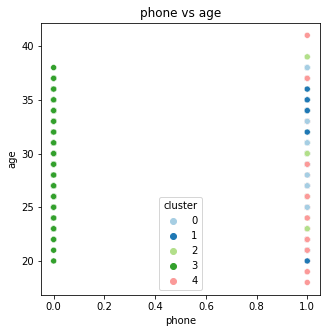

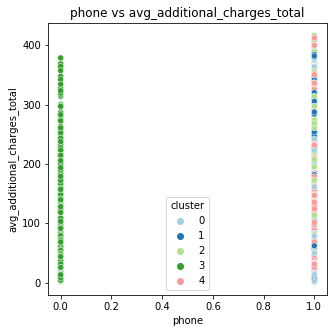

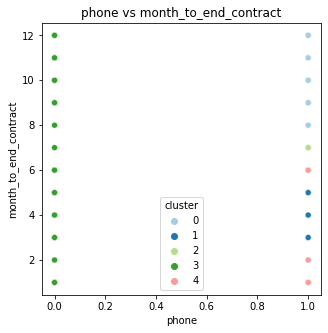

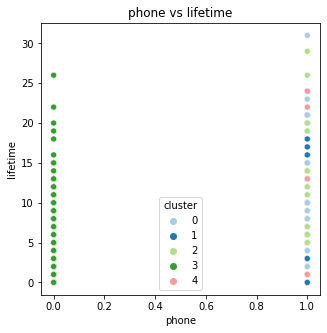

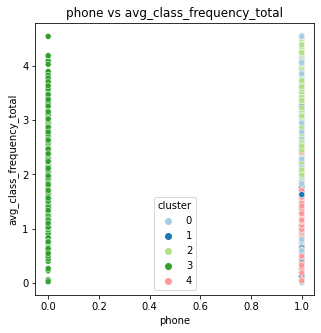

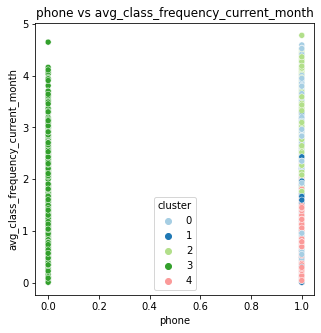

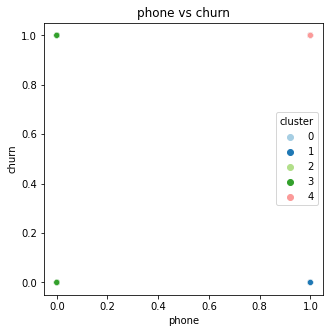

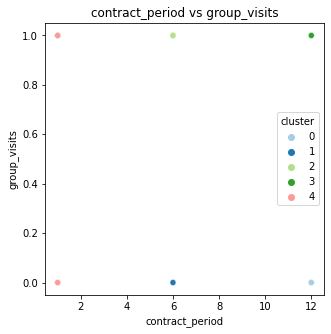

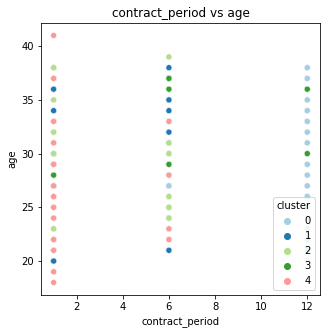

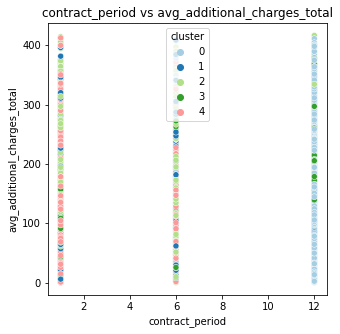

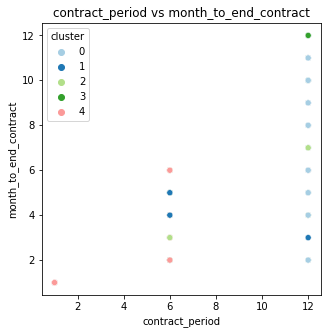

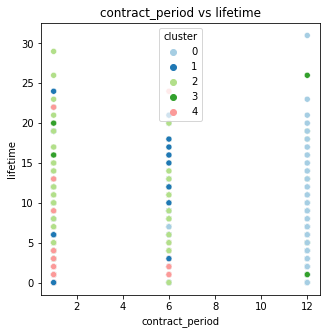

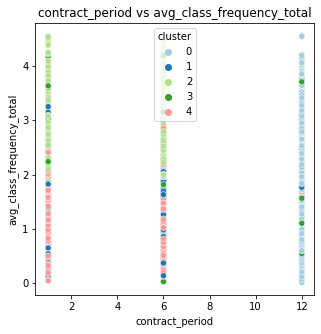

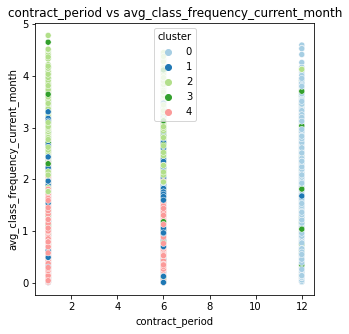

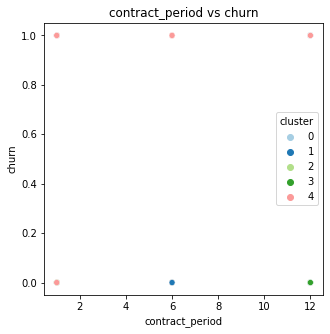

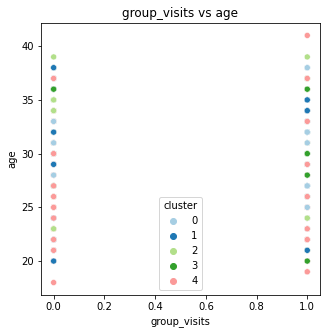

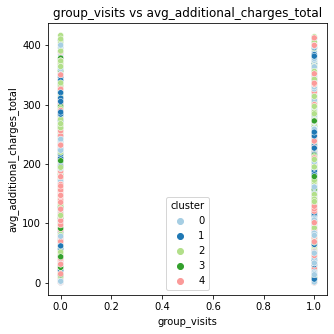

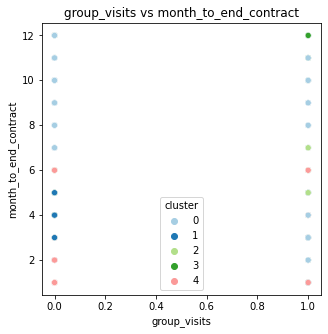

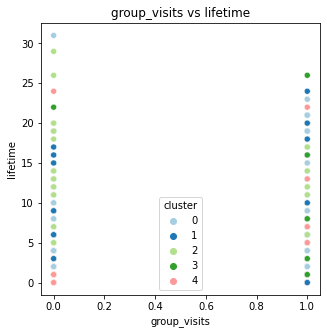

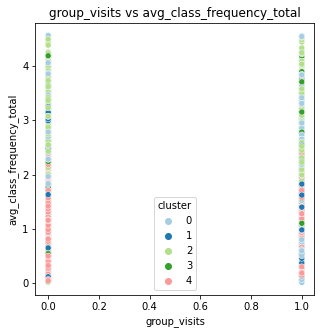

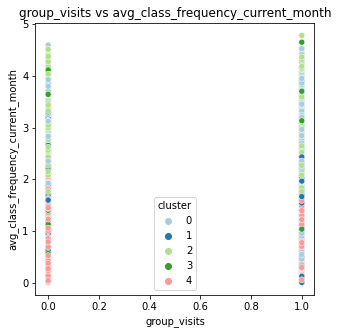

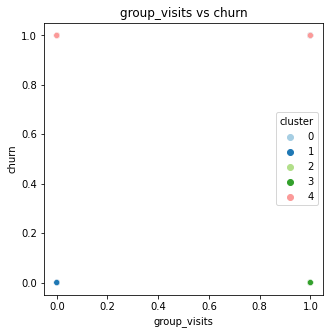

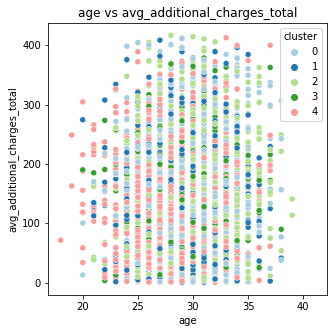

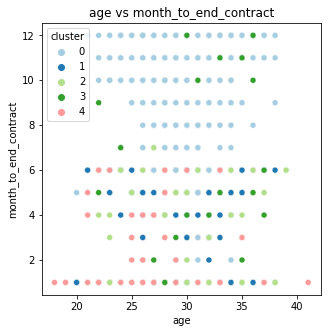

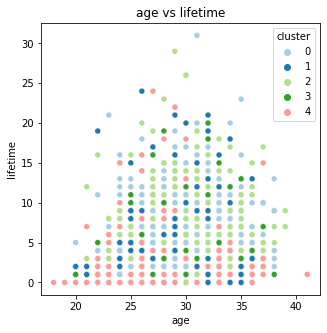

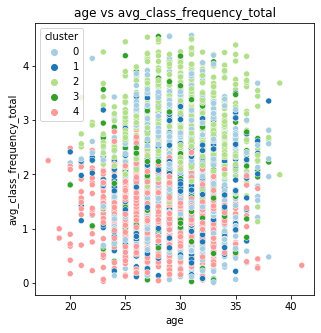

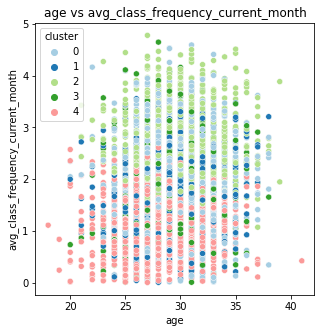

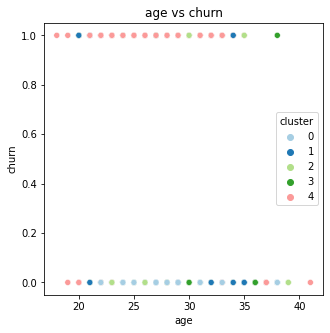

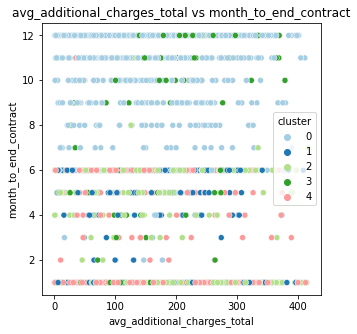

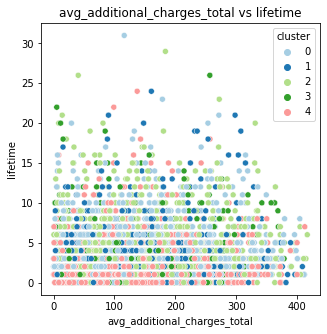

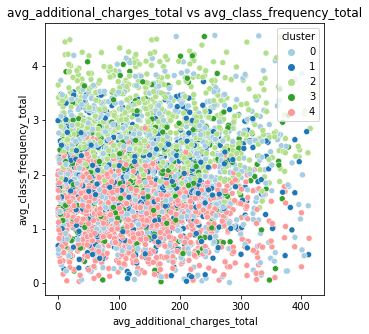

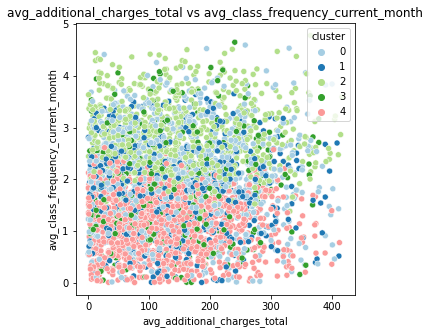

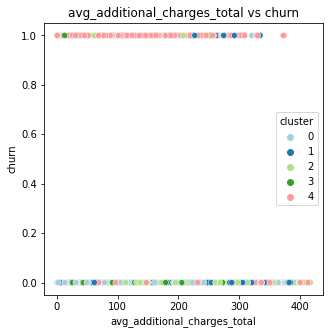

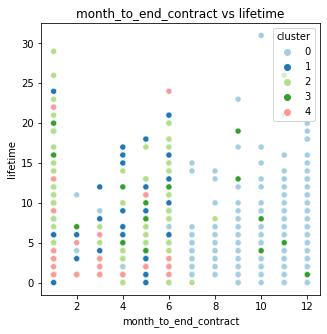

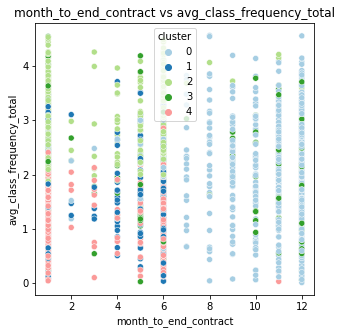

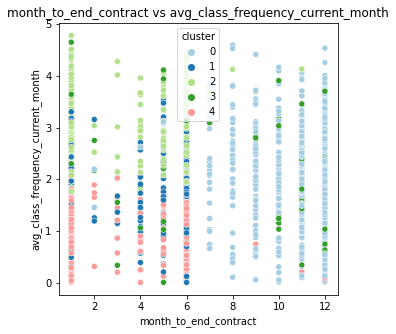

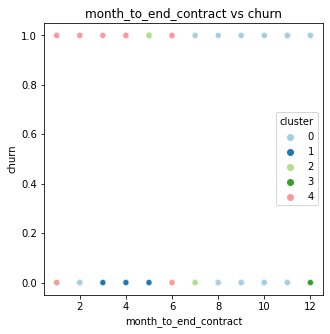

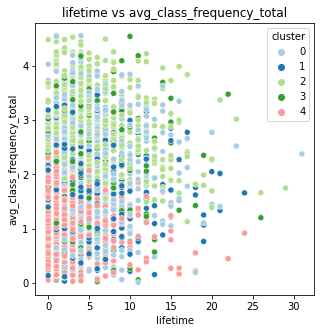

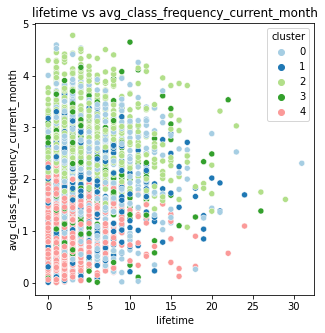

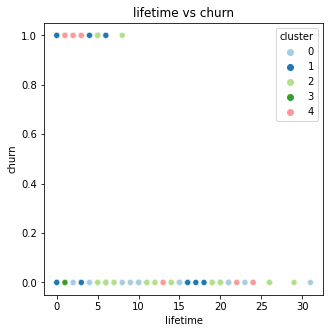

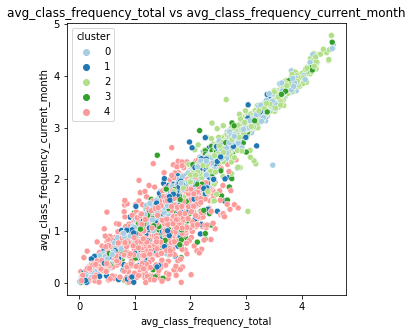

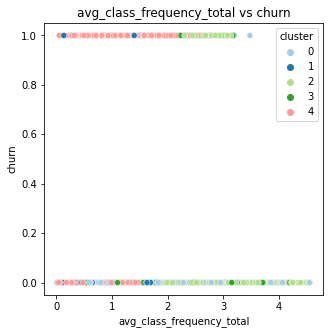

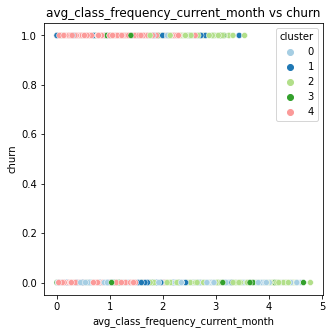

In [41]:
col_pairs = list(combinations(df2.drop('cluster', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(df2, pair[0], pair[1], 'cluster')
    import warnings
    warnings.filterwarnings("ignore")

- На графиках не видно четкого распределения кластеров. 
- **Можно выделить некоторые особенности кластеров:**


- *У группы 0:*
   
    - самый маленькой отток клиентов
    - самый большой средний период абонемента
    - самый большой Лайфтайм
    
- *У группы 1:* 
    
    - все клиенты пришли по акции
    - самое большое количество клиентов по партнерской программе
    
- *У группы 2:*
    
    - самое большое количество посещения зала
    - самое маленькое количество клиентов по партнерской программе
    
- *У группы 3:*
     
    - нет контактных телефонов
     
- *У группы 4*
     
    - средний возраст пониже остальных 
    - маленькое количество приглашенных по акции клиентов
    - самый маленький средний период абонемента
    - самый маленький Лайфтайм
    - самый маленькой количество посещения зала
    - самый большой отток клиентов  
    - ходят в зал в основном те, кто живет рядом    

**Оценим, насколько хорошо модель делит объекты**

*Используем **метрику силуэта**. Она показывает, насколько объект своего кластера похож на свой кластер больше, чем на чужой*

In [42]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.13


- Метрика низкая, подтверждает хаос на графиках

- **<font color="brown">Для каждого полученного кластера посчитаем долю оттока </font>**

In [43]:
df2_part = df2.groupby(['cluster','churn'])['churn'].agg({'count'}).reset_index().query('cluster == 4')
df2_part

,cluster,churn,count
8,4,0,564
9,4,1,622


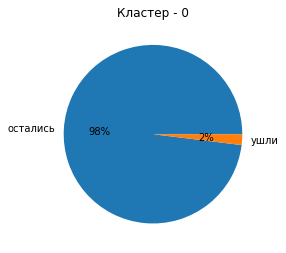

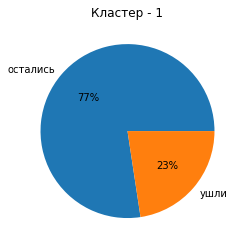

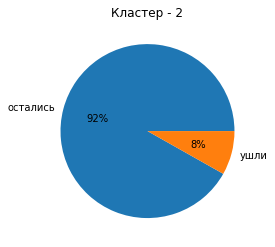

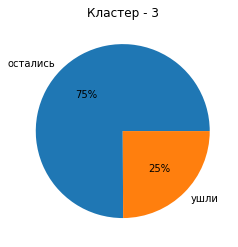

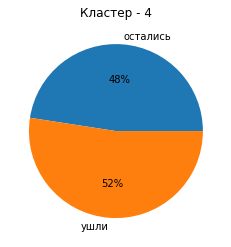

In [44]:
plt.figure(figsize=(4, 5))

#labels = ['остались','ушли']
#plt.pie(x=df2_part['count'], data=df2_part, autopct = '%0.0f%%',labels=labels)

for j in ['0','1','2','3','4']:
    labels = ['остались','ушли']
    j1=int(j)
    #plt.subplot(2,3, j1+1)
    df2_part = df2.groupby(['cluster','churn'])['churn'].agg({'count'}).reset_index().query('cluster == @j1')
    
    plt.pie(x=df2_part['count'], data=df2_part, autopct = '%0.0f%%',labels=labels)
    plt.title('Кластер - {}'.format(j))
    plt.show()  


**Доля оттока по кластерам кластеров**

*Самые надежные кластеры:*

    - 0 - уходят 2%
    - 2 - уходят 8%
    
*Самые ненадежный кластер:*

    - 4 - уходят 52%  
    
В классах 1 и 3 уходят 23% и 25% соответственно

### Вывод

<div style="border:solid indigo 2px; padding: 20px">

**Дендрограмма**
    
    - График выделил 4 класса.
    - 4й класс имеет 2 крупные ветки, которые можно поделить
    - Итого - **можно выделить 5 классов**
    
**Графики попарного сравнения признаков по кластерам**  
    
     - На графиках не видно четкого распределения кластеров
     - Это подтверждает низкая метрика силуэта - 0,13.
    
**Можно выделить некоторые особенности кластеров:**
    
    - У группы 3 нет контактных телефонов
    - У группы 4 средний возраст пониже остальных 
    - У группы 4 маленькое количество приглашенных по акции клиентов
    - У группы 1 все клиенты пришли по акции
    - У группы 0 самый большой средний период абонемента
    - У группы 4 самый маленький средний период абонемента
    - У группы 0 самый большой Лайфтайм
    - У группы 4 самый маленький Лайфтайм
    - У группы 2 самый большое количество посещения зала  
    - У группы 4 самый маленькой количество посещения зала
    - У группы 0 самый маленькой отток клиентов
    - У группы 4 самый большой отток клиентов  
    - У группы 2 самое маленькое количество клиентов по партнерской программе   
    - У группы 1 самое большое количество клиентов по партнерской программе  
    - У группы 4 ходят в зал в основном те, кто живет рядом

**Доля оттока по кластерам кластеров**

*Самые надежные кластеры:*

        - 0 - уходят 2%. Имеет период абонемента в основном 1 год. Соответсвенно большой лайфтайм и высокое посещение зала.
        - 2 - уходят 8%. Большинство не сотрудники партнеров компании. КЛиенты осмысленно пришли заниматься, поэтому и посещений много.

*Самые ненадежный кластер:*

        - 4 - уходят 52%. Имеет самый короткий абонемент, соответсвенно маленький лайфтайм и посещение зала. Малое количество приглашенных по акции. В основном ходят все из дома. 

    В классах 1 и 3 уходят 23% и 25% соответственно.

## **<font color="green">Шаг 5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами</font>**


<div style="border:solid indigo 3px; padding: 20px">    

**Средние признаков тех, кто ушел и кто остался**

    - М или Ж не важно, уходят одинаковое количество
    - Если фитнес рядом с домом - остаются охотнее
    - Сотрудники компаний-партнеров уходят реже
    - По акции 'приведи друга' уходят реже
    - Наличие контактного телефона не влияет на уход
    - Чем длительнее абонемент, тем реже уходит клиент
    - Клиент, посещающий групповые занятия, уходит реже
    - Возраст не влияет на уход
    - Чаще уходят те, кто меньше тратит на дополнительные услуги фитнеса
    - Чем больше времени до конца контракта, тем реже человек уходит
    - Чем Выше Лайфтайм, тем клиент уходит реже
    - Кто чаще ходит в неделю, тот чаще остается в зале
    - Кто чаще ходит в месяц, тот чаще остается в зале
    
**Распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**
    
    - Распределения по возрасту - нормальные, остаются в основном 28-31летние, уходят 25-28летние
    - По дополнительным платам - есть часто использующие в районе 150, а также редко, но значительные суммы
    - Месяцев до конца абонемента - уходят в основном те, кому остался 1 месяц
    - Лайфтайм - уходят в основном те, кто ходит до 2х месяцев. Основной лайфтайм - 1 год, но есть и долгожителя клуба
    - Общая средняя частота посещений и частота посещений в месяц имеют схожие распределения с пиками в 0. Кто то записался в клуб, но ни разу не ходил в фитнес. Пользовались иными плюшками
    
**Корреляция**
    
    - Высокая корреляция у срока абонемента и количество месяцев до конца абонемента.
    - Высокая корреляция у средней частоты посещения в месяц и общим средним посещением фитнес центра
*Касаемо целевой переменной (отток):* 
    
            * отрицательная корреляция с временем с момента первого обращения в фитнес-центр. Чем больше lifetime, тем чаще клиент остается 
            * отрицательная корреляция с частотой посещений в месяц. Чем чаще ходит в месяц, тем реже уходит клиент
            * отрицательная корреляция со сроком абонемента. Чем дольше абонемент, тем реже уходит клиент
            * отрицательная корреляция с количество месяцев до конца абонемента. Чем больше месяцев осталось, тем реже уходит клиент

**Дендрограмма**
    
    - График выделил 4 класса.
    - 4й класс имеет 2 крупные ветки, которые можно поделить
    - Итого - **можно выделить 5 классов**
    
**Графики попарного сравнения признаков по кластерам**  
    
     - На графиках не видно четкого распределения кластеров
     - Это подтверждает низкая метрика силуэта - 0,13.
    
**Можно выделить некоторые особенности кластеров:**
    
    - У группы 3 нет контактных телефонов
    - У группы 4 средний возраст пониже остальных 
    - У группы 4 маленькое количество приглашенных по акции клиентов
    - У группы 1 все клиенты пришли по акции
    - У группы 0 самый большой средний период абонемента
    - У группы 4 самый маленький средний период абонемента
    - У группы 0 самый большой Лайфтайм
    - У группы 4 самый маленький Лайфтайм
    - У группы 2 самый большое количество посещения зала  
    - У группы 4 самый маленькой количество посещения зала
    - У группы 0 самый маленькой отток клиентов
    - У группы 4 самый большой отток клиентов  
    - У группы 2 самое маленькое количество клиентов по партнерской программе   
    - У группы 1 самое большое количество клиентов по партнерской программе  
    - У группы 4 ходят в зал в основном те, кто живет рядом

**Доля оттока по кластерам кластеров**

*Самые надежные кластеры:*

        - 0 - уходят 2%. Имеет период абонемента в основном 1 год. Соответсвенно большой лайфтайм и высокое посещение зала.
        - 2 - уходят 8%. Большинство не сотрудники партнеров компании. КЛиенты осмысленно пришли заниматься, поэтому и посещений много.

*Самые ненадежный кластер:*

        - 4 - уходят 52%. Имеет самый короткий абонемент, соответсвенно маленький лайфтайм и посещение зала. Малое количество приглашенных по акции. В основном ходят все из дома. 

    В классах 1 и 3 уходят 23% и 25% соответственно.

<div style="border:solid red 3px; padding: 20px">  
    
- **<font color="brown">Рекомендации по работе с клиентами</font>**
    
**Необходимо уменьшить отток группы 4**:
    
    - Увеличить период абонемента. Это увеличит лайфтайм и частоту посещений.
    - Использовать в данной группе Промо акцию - пригласи друга
    - Предложить партнерские программы работодателям клиентов
    
**Необходимо уменьшить отток группы 1**:
    
    - Здесь в основном клиенты по партнерским программа и большинство ходит с работы или в обед межет быть. Нужно привлечь рядом проживающих жителей
    - Также все клиенты здесь пришли по акции. Нужно притянуть заинтересованных людей без такой акции
    
**Необходимо уменьшить отток группы 3**:
    
    - Добавить контактные телефоны. Писать о сроках абонемента, акциях и тд
    